In [1]:
%pip install "scikit-learn<1.6"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 34.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [1]:
import pandas as pd

In [33]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

In [34]:
len(train), len(test)

(1200000, 800000)

In [35]:
df = pd.concat([train, test], axis=0)

In [36]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    2000000 non-null  int64  
 1   Age                   1968806 non-null  float64
 2   Gender                2000000 non-null  object 
 3   Annual Income         1925191 non-null  float64
 4   Marital Status        1969135 non-null  object 
 5   Number of Dependents  1817198 non-null  float64
 6   Education Level       2000000 non-null  object 
 7   Occupation            1402800 non-null  object 
 8   Health Score          1876475 non-null  float64
 9   Location              2000000 non-null  object 
 10  Policy Type           2000000 non-null  object 
 11  Previous Claims       1393169 non-null  float64
 12  Vehicle Age           1999991 non-null  float64
 13  Credit Score          1770667 non-null  float64
 14  Insurance Duration    1999997 non-null  

In [37]:
del df['id']

In [38]:
# annual income & premium amount has a long tail -> log transformer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
df['Annual Income'] = log_transformer.fit_transform(df[['Annual Income']])
df['Premium Amount'] = log_transformer.fit_transform(df[['Premium Amount']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


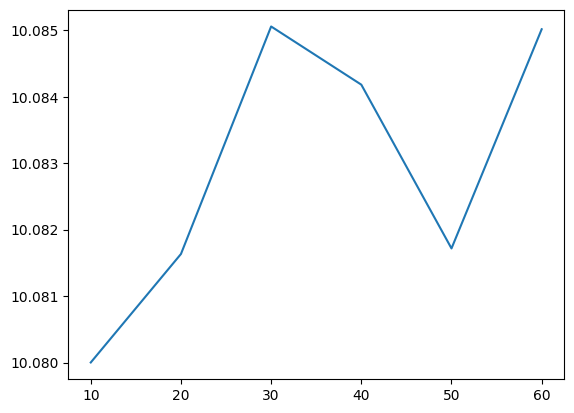

In [39]:
import matplotlib.pyplot as plt
df['AgeGroup'] = (df['Age'] // 10) * 10
result = df.groupby('AgeGroup')['Annual Income'].median()
plt.plot(result)

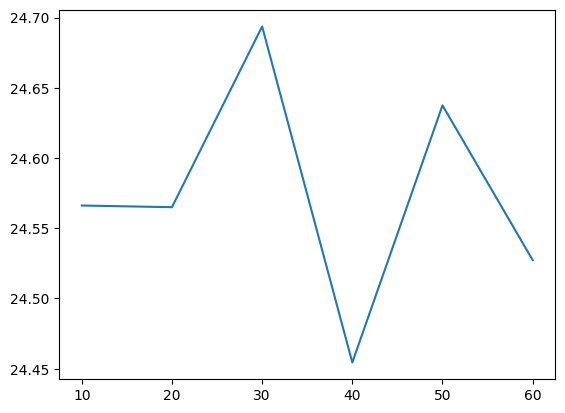

In [40]:
result = df.groupby('AgeGroup')['Health Score'].median()
plt.plot(result)

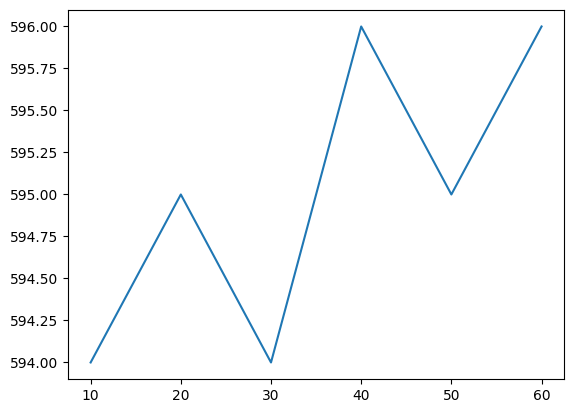

In [41]:
result = df.groupby('AgeGroup')['Credit Score'].median()
plt.plot(result)

In [42]:
# Insurance Duration, AgeGroup, Number of Dependents null -> mode & -1(Unknown)
for col in ['Insurance Duration', 'AgeGroup', 'Number of Dependents']:
    df[col+'_1'] = df[col].fillna(df[col].mode()[0])
    df[col] = df[col].fillna(-1)

# Vehicle Age -> mean & -1(Unknown)
df['Vehicle Age'+'_1'] = df['Vehicle Age'].fillna(df['Vehicle Age'].mean())
df['Vehicle Age'] = df['Vehicle Age'].fillna(-1)

# Annual Income, Health Score, Credit Score null -> hierarchical sampling with according to age with median & -1(Unknown)
for col in ['Annual Income', 'Health Score', 'Credit Score']:
    df[col+'_1'] = df[col].fillna(df.groupby('AgeGroup')[col].transform('median'))
    df[col] = df[col].fillna(-1)

# Marital Status, Occupation, Customer Feedback null -> Unknown
for col in ['Marital Status', 'Occupation', 'Customer Feedback']:
    df[col].fillna('Unknown', inplace=True)

<ipython-input-42-9988ac1cefca>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [43]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Age                     1968806 non-null  float64
 1   Gender                  2000000 non-null  object 
 2   Annual Income           2000000 non-null  float64
 3   Marital Status          2000000 non-null  object 
 4   Number of Dependents    2000000 non-null  float64
 5   Education Level         2000000 non-null  object 
 6   Occupation              2000000 non-null  object 
 7   Health Score            2000000 non-null  float64
 8   Location                2000000 non-null  object 
 9   Policy Type             2000000 non-null  object 
 10  Previous Claims         1393169 non-null  float64
 11  Vehicle Age             2000000 non-null  float64
 12  Credit Score            2000000 non-null  float64
 13  Insurance Duration      2000000 non-null  float64
 14  Policy S

In [44]:
del df['Age']

In [45]:
# convert 'Policy Start Date' to 'Policy Start Year'
df1 = df.copy()
df1['Policy Start Date'] = pd.to_datetime(df1['Policy Start Date'])
df1['Policy Start Year'] = pd.DatetimeIndex(df1['Policy Start Date']).year
df1['Policy Start Year'].astype('object')
df['Policy Start Year'] = df1['Policy Start Year'].astype('object')
del df['Policy Start Date']
df.insert(14, 'Policy Start Year', df.pop('Policy Start Year'))

In [46]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 27 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Gender                  2000000 non-null  object 
 1   Annual Income           2000000 non-null  float64
 2   Marital Status          2000000 non-null  object 
 3   Number of Dependents    2000000 non-null  float64
 4   Education Level         2000000 non-null  object 
 5   Occupation              2000000 non-null  object 
 6   Health Score            2000000 non-null  float64
 7   Location                2000000 non-null  object 
 8   Policy Type             2000000 non-null  object 
 9   Previous Claims         1393169 non-null  float64
 10  Vehicle Age             2000000 non-null  float64
 11  Credit Score            2000000 non-null  float64
 12  Insurance Duration      2000000 non-null  float64
 13  Customer Feedback       2000000 non-null  object 
 14  Policy S

In [47]:
df = pd.get_dummies(df, dtype='int')

In [48]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 55 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Annual Income                2000000 non-null  float64
 1   Number of Dependents         2000000 non-null  float64
 2   Health Score                 2000000 non-null  float64
 3   Previous Claims              1393169 non-null  float64
 4   Vehicle Age                  2000000 non-null  float64
 5   Credit Score                 2000000 non-null  float64
 6   Insurance Duration           2000000 non-null  float64
 7   Premium Amount               1200000 non-null  float64
 8   AgeGroup                     2000000 non-null  float64
 9   Insurance Duration_1         2000000 non-null  float64
 10  AgeGroup_1                   2000000 non-null  float64
 11  Number of Dependents_1       2000000 non-null  float64
 12  Vehicle Age_1                2000000 non-null  f

In [49]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [50]:
%pip install lightbgm

ERROR: Could not find a version that satisfies the requirement lightbgm (from versions: none)
ERROR: No matching distribution found for lightbgm


In [51]:
# make a regression model to predict previous claims
df_previous_claims = df[df['Previous Claims'].notna()]
df_no_previous_claims = df[df['Previous Claims'].isna()]

del df_previous_claims['Premium Amount']
del df_no_previous_claims['Premium Amount']

# train_test split
from sklearn.model_selection import train_test_split
train_set, test_set_from_train = train_test_split(df_previous_claims, test_size=0.2, random_state=42)

# split target and features
X_train = df_previous_claims.drop('Previous Claims', axis=1)
y_train = df_previous_claims['Previous Claims'].copy()

# build model
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from catboost import CatBoostRegressor as Catboost
from lightgbm import LGBMRegressor

stacking_reg = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('LGBM', LGBMRegressor(n_estimators=73, max_depth=10, random_state=42)),
        ('xgboost', xgb.XGBRegressor(max_depth=8, n_estimators=50, random_state=42)),
        ('catboost',Catboost(iterations=40, depth=7, learning_rate=1, random_state=42)),
    ],
    final_estimator=LinearRegression(),
    n_jobs=-1,
    cv=3
)
stacking_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


StackingRegressor(cv=3,
                  estimators=[('lr', LinearRegression()),
                              ('LGBM',
                               LGBMRegressor(max_depth=10, n_estimators=73,
                                             random_state=42)),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feat...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x7e47ffd1f2b0>)],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [52]:
# test
X_test = test_set_from_train.drop('Previous Claims', axis=1)
y_test = test_set_from_train['Previous Claims'].copy()

y_pred = stacking_reg.predict(X_test)

from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
rmse

0.9535830465848398

In [53]:
test_set = df_no_previous_claims.copy()
del test_set['Previous Claims']
y_pred = stacking_reg.predict(test_set)

# fill nan of df['Previous Claims'] with y_pred
df.loc[df['Previous Claims'].isna(), 'Previous Claims'] = y_pred

In [54]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 799999
Data columns (total 55 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Annual Income                2000000 non-null  float64
 1   Number of Dependents         2000000 non-null  float64
 2   Health Score                 2000000 non-null  float64
 3   Previous Claims              2000000 non-null  float64
 4   Vehicle Age                  2000000 non-null  float64
 5   Credit Score                 2000000 non-null  float64
 6   Insurance Duration           2000000 non-null  float64
 7   Premium Amount               1200000 non-null  float64
 8   AgeGroup                     2000000 non-null  float64
 9   Insurance Duration_1         2000000 non-null  float64
 10  AgeGroup_1                   2000000 non-null  float64
 11  Number of Dependents_1       2000000 non-null  float64
 12  Vehicle Age_1                2000000 non-null  f

In [55]:
train = df.iloc[:len(train)]
test = df.iloc[len(train):]

In [56]:
train.to_csv('11_train.csv', index=False)
test.to_csv('11_test.csv', index=False)